In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 37.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
import os
import pandas as pd

df = pd.read_csv(os.path.join(path, "spam.csv"), encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1": "target", "v2": "text"})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != '']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()
y = df['target'].map({'ham': 0, 'spam': 1}).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
max_length = 100
X_train_pad = pad_sequences(X_train, maxlen=max_length)
X_test_pad = pad_sequences(X_test, maxlen=max_length)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=X.shape[1], output_dim=128, input_length=max_length))  # Input dimension is vocabulary size
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8632 - loss: 0.4292 - val_accuracy: 0.8655 - val_loss: 0.3958
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.8568 - loss: 0.4179 - val_accuracy: 0.8655 - val_loss: 0.4060
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8654 - loss: 0.4007 - val_accuracy: 0.8655 - val_loss: 0.3970
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8642 - loss: 0.4050 - val_accuracy: 0.8655 - val_loss: 0.4185
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.8706 - loss: 0.3960 - val_accuracy: 0.8655 - val_loss: 0.3980


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8760 - loss: 0.3809
Loss: 0.39804041385650635, Accuracy: 0.865470826625824


In [ ]:
predictions = model.predict(X_test_pad)
predicted_classes = (predictions > 0.5).astype(int)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
print("Predicted classes:", predicted_classes.flatten())

Predicted classes: [0 0 0 ... 0 0 0]


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8712 - loss: 0.3886 - val_accuracy: 0.8655 - val_loss: 0.3950
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8659 - loss: 0.3997 - val_accuracy: 0.8655 - val_loss: 0.3965
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8613 - loss: 0.4045 - val_accuracy: 0.8655 - val_loss: 0.4066
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8684 - loss: 0.3936 - val_accuracy: 0.8655 - val_loss: 0.4016
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8644 - loss: 0.3994 - val_accuracy: 0.8655 - val_loss: 0.3970


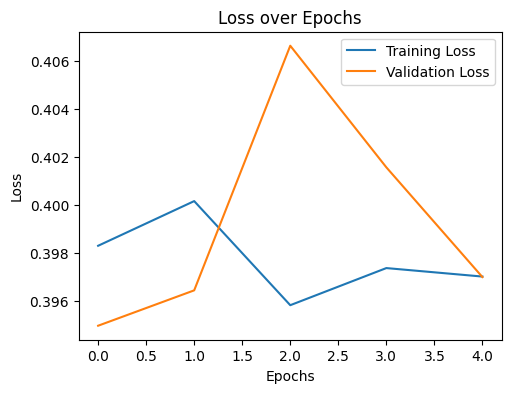

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

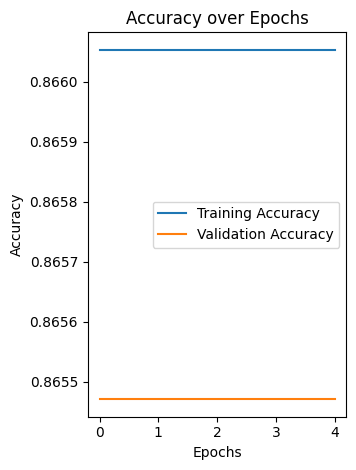

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

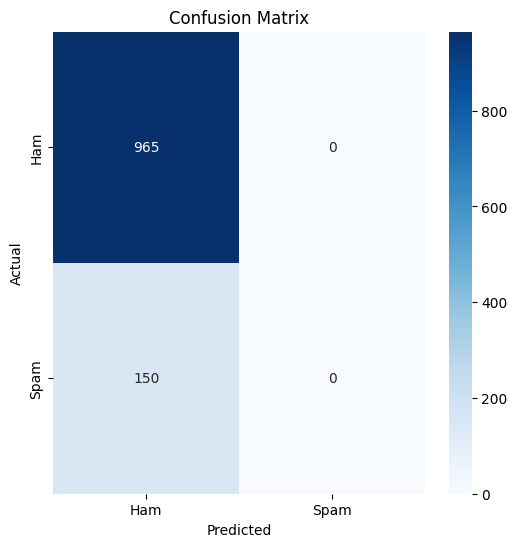

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()